In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os
import itertools
import rasterio
from matplotlib import pyplot as plt
import geopandas as gpd
from rasterstats import zonal_stats
from tqdm import tqdm
import xarray as xr
from rasterstats import zonal_stats


In [7]:
def simplex_mean(in_dir, keyword):
    
    
    simplex_rasters = np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(simplex_rasters).str.contains(keyword)
    files = simplex_rasters[tifs]
    
    mean_simplex = []
    
    for filename in files:
            simplex_raster = rasterio.open(in_dir + filename)
            read_raster = simplex_raster.read(1)
            
            #smean_lcmask_infmask = smean_lcmask[smean_lcmask != float('-inf')| float('inf')]
            mean_raster = read_raster[np.isfinite(read_raster)].mean()
            #mean_raster = np.nanmean(read_raster)
            mean_simplex.append(mean_raster)
            
    return mean_simplex


In [3]:
psc = '/home/rgreen/DroughtEDM/Data/Prediction_skill_climatology/'
psc10 = '/home/rgreen/DroughtEDM/Data/Prediction_skill_climatology/ED10/'
psc2 = '/home/rgreen/DroughtEDM/Data/Prediction_skill_climatology/ED2/'
psc6 = '/home/rgreen/DroughtEDM/Data/Prediction_skill_climatology/ED6/'

In [46]:
mean_monthly_simplex_bo = simplex_mean(psc, 'bo')
mean_monthly_simplex_ci = simplex_mean(psc, 'ci')
mean_monthly_simplex_cr = simplex_mean(psc, 'cr')
mean_monthly_simplex_gr = simplex_mean(psc, 'gr')
mean_monthly_simplex_sh = simplex_mean(psc, 'sh')

In [11]:
mean_monthly_simplex_bo

[0.108524084,
 0.10472355,
 0.12477321,
 0.19754273,
 0.31687206,
 0.24257977,
 0.12894472,
 0.13121116,
 0.13687971,
 0.20771003,
 0.3007016,
 0.22453098]

In [14]:
months = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']

<BarContainer object of 12 artists>

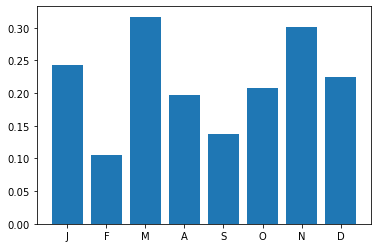

In [15]:
fig = plt.figure()
plt.bar(months, mean_monthly_simplex_bo)

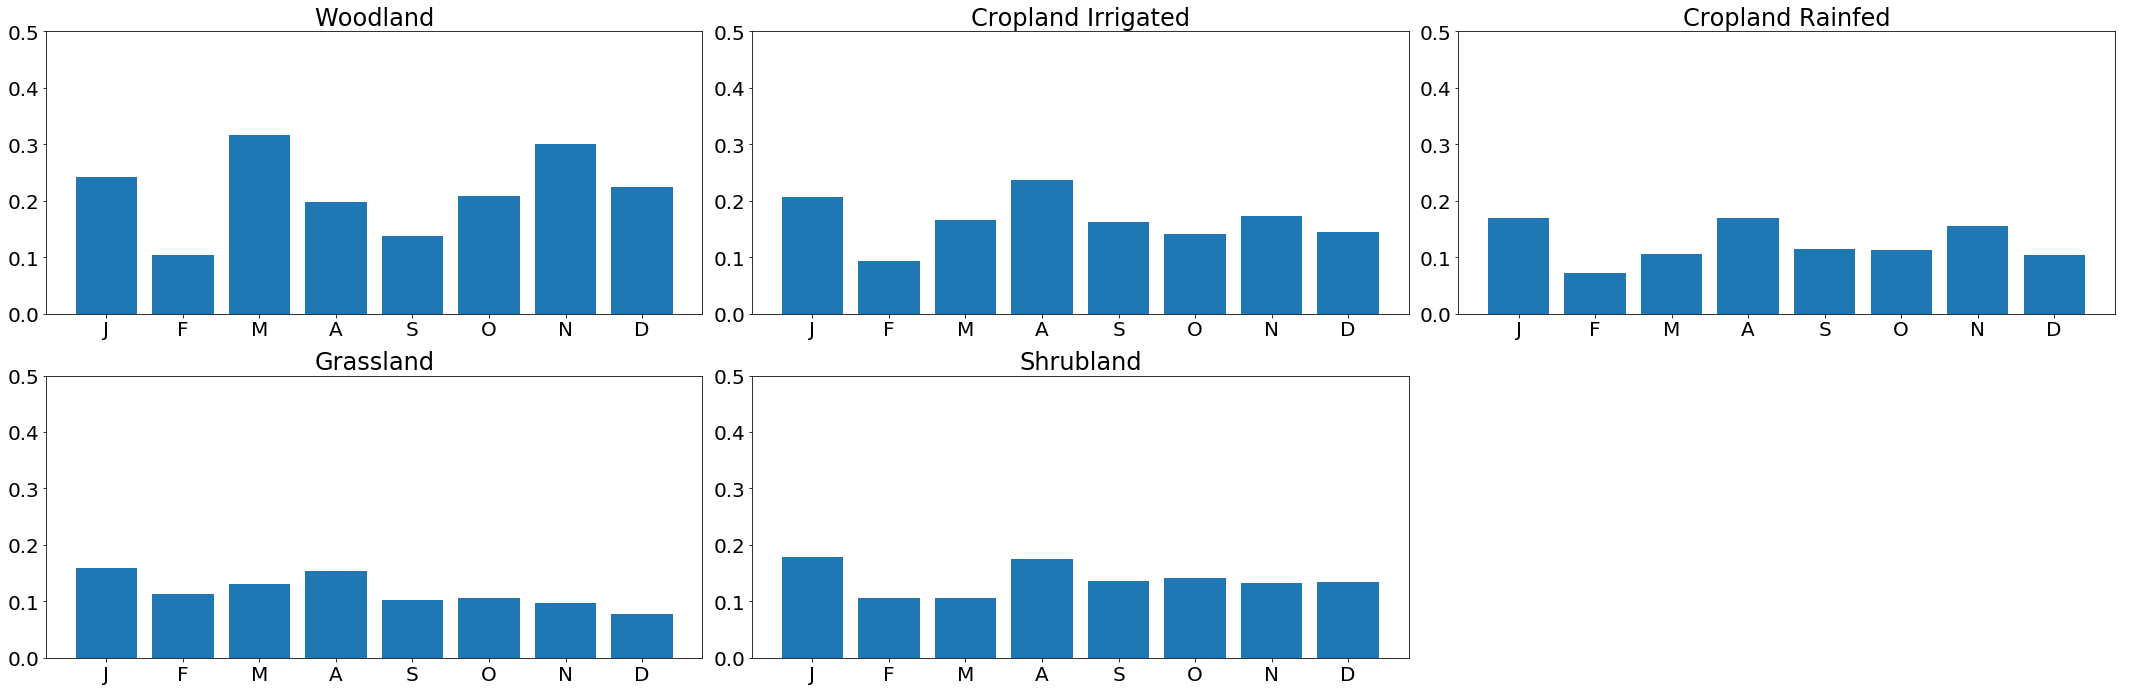

In [51]:
fig = plt.figure(figsize = (30,10))
ax = fig.add_subplot(111)   
ax1 = fig.add_subplot(231)
ax1.set_ylim([0,0.5])
ax1.bar(months, mean_monthly_simplex_bo)
ax2 = fig.add_subplot(232)
ax2.set_ylim([0,0.5])
ax2.bar(months, mean_monthly_simplex_ci)
ax3 = fig.add_subplot(233)
ax3.bar(months, mean_monthly_simplex_cr)
ax3.set_ylim([0,0.5])
ax4 = fig.add_subplot(234)
ax4.bar(months, mean_monthly_simplex_gr)
ax4.set_ylim([0,0.5])
ax5 = fig.add_subplot(235)
ax5.bar(months, mean_monthly_simplex_sh)
ax5.set_ylim([0,0.5])

#ax1.tick_params(axis='both', which='major', labelsize=12)
#ax1.tick_params(axis='both', which='minor', labelsize=8)

ax1.yaxis.set_tick_params(labelsize=20)
ax1.xaxis.set_tick_params(labelsize=20)
ax2.yaxis.set_tick_params(labelsize=20)
ax2.xaxis.set_tick_params(labelsize=20)
ax3.yaxis.set_tick_params(labelsize=20)
ax3.xaxis.set_tick_params(labelsize=20)
ax4.yaxis.set_tick_params(labelsize=20)
ax4.xaxis.set_tick_params(labelsize=20)
ax5.yaxis.set_tick_params(labelsize=20)
ax5.xaxis.set_tick_params(labelsize=20)

ax1.set_title('Woodland', fontsize = 24)
ax2.set_title('Cropland Irrigated', fontsize = 24)
ax3.set_title('Cropland Rainfed', fontsize = 24)
ax4.set_title('Grassland', fontsize = 24)
ax5.set_title('Shrubland', fontsize = 24)


ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
plt.tight_layout()